# Python Project: Movie Dataset Correlation

### This analysis looks at a dataset on movies released from 1980 - 2020. The purpose is to hypothesize if any strong correlations between the categories exists and what they are, then use Python to analyze the data to see if the evidence supports the hypothesis.

In [26]:
# Import the required packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Import the Movie dataset
df = pd.read_csv(r'C:\Users\alyss\Downloads\Movies - Python Version.csv')

In [27]:
#Check to see if data imported successfully
df.head()

,name,rating,genre,year,released,month,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",June,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",July,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",June,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",July,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",July,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98


In [28]:
#Check for missing data in datset

##Create a for loop(loop though columns to scan for missing data):
for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_data))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
month - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [29]:
# Look at data types in dataset
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
month        object
director     object
writer       object
star         object
country      object
budget        int64
gross       float64
company      object
runtime       int64
dtype: object

In [30]:
#Remove the decimal places in number columns

# Change the data type for selected columns:
df['gross'] = df['gross'].astype('int64')

In [31]:
df.head()

,name,rating,genre,year,released,month,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",June,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",July,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",June,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980",July,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980",July,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [32]:
# Create a new 'year' column from the released date column

df['year2'] = df['released'].astype(str).str[-5:] #--> takes the last four values from 'released' column

df.head()

,name,rating,genre,year,released,month,director,writer,star,country,budget,gross,company,runtime,year2
0,The Shining,R,Drama,1980,"June 13, 1980",June,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",July,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",June,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980",July,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980",July,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [33]:
# Order the dataset by gross in descending order 
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,month,director,writer,star,country,budget,gross,company,runtime,year2
3731,Avatar,PG-13,Action,2009,"December 18, 2009",December,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
5302,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",April,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
1795,Titanic,PG-13,Drama,1997,"December 19, 1997",December,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",December,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
5158,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",April,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


In [34]:
# Find and drop duplicate rows

df['company'].drop_duplicates().sort_values(ascending=False).head()

5101        thefyzz
3920    micro_scope
2551       i5 Films
4834     i am OTHER
4537           erbp
Name: company, dtype: object

## Hypothesis about what categories have strong correlations:
* The bigger/more well known the company = more likely for higher movie budget
* Higher budget = higher gross

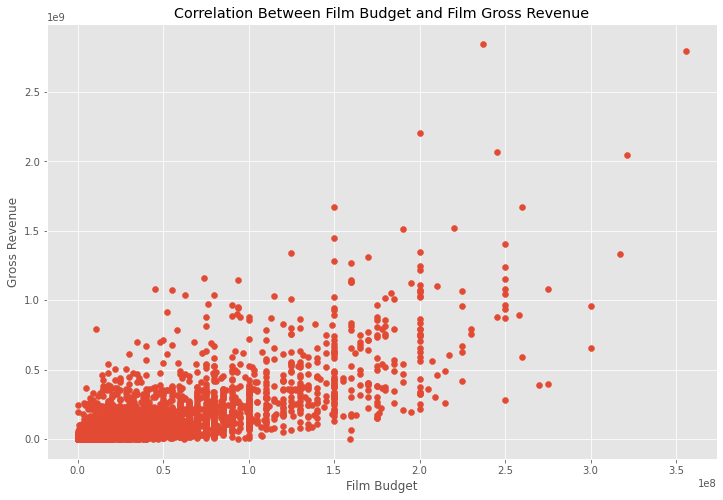

In [35]:
# Create a scatterplot to visualise gross vs. budget:
plt.scatter(x=df['budget'], y=df['gross'])

#Label the graph
plt.title('Correlation Between Film Budget and Film Gross Revenue') #Graph Title Name
plt.xlabel('Film Budget') #x-axis label
plt.ylabel('Gross Revenue') #y-axis label

plt.show()

In [36]:
df.head()

,name,rating,genre,year,released,month,director,writer,star,country,budget,gross,company,runtime,year2
3731,Avatar,PG-13,Action,2009,"December 18, 2009",December,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
5302,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",April,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
1795,Titanic,PG-13,Drama,1997,"December 19, 1997",December,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",December,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
5158,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",April,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


Text(0, 0.5, 'Gross Revenue')

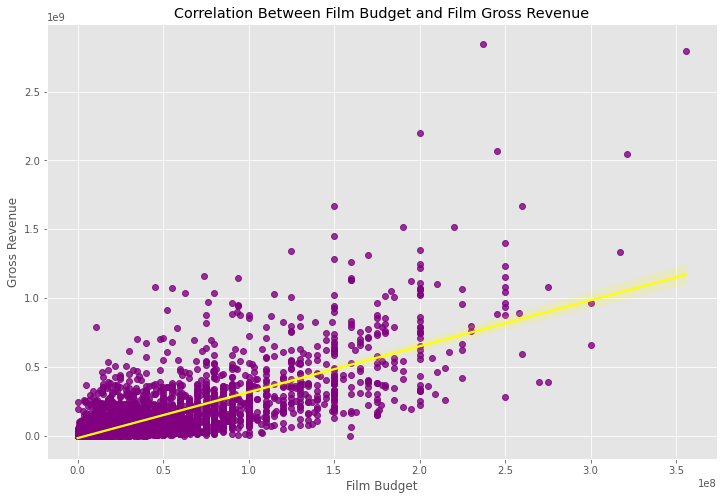

In [37]:
#Add in a trendline using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "purple"}, line_kws={"color":"yellow"})

plt.title('Correlation Between Film Budget and Film Gross Revenue') #Graph Title Name
plt.xlabel('Film Budget') #x-axis label
plt.ylabel('Gross Revenue') #y-axis label

In [38]:
#Find the correlation
df.corr(method='pearson') #Can change the correlation 

,year,budget,gross,runtime
year,1.000000,0.327722,0.274321,0.075077
budget,0.327722,1.000000,0.740247,0.318695
gross,0.274321,0.740247,1.000000,0.275796
runtime,0.075077,0.318695,0.275796,1.000000


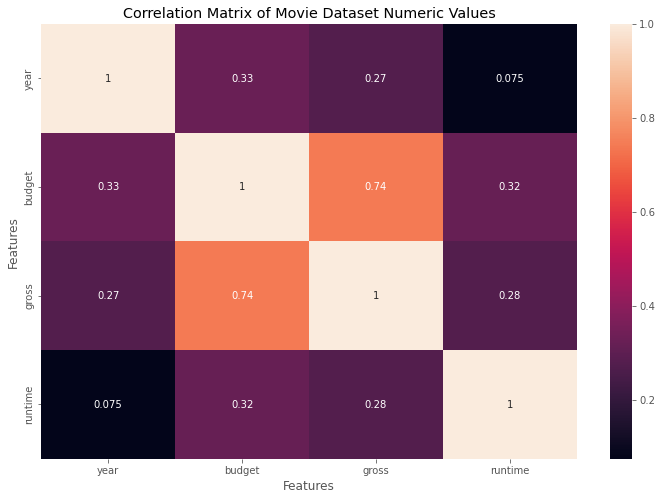

In [39]:
#Create a matrix to visualise the correlations of numeric value columns
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix of Movie Dataset Numeric Values') #Graph Title Name
plt.xlabel('Features') #x-axis label
plt.ylabel('Features') #y-axis label

plt.show()

In [40]:
#Turn the word columns into numeric values
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):                           #--> if data type of column = 'object'
        df_numerized[col_name] = df_numerized[col_name].astype('category')  #--> change data type = 'column'
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,month,director,writer,star,country,budget,gross,company,runtime,year2
3731,386,5,0,2009,491,3,785,1263,1534,47,237000000,2847246203,1382,162,29
5302,388,5,0,2019,119,1,105,513,1470,47,356000000,2797501328,983,181,39
1795,4909,5,6,1997,497,3,785,1263,1073,47,200000000,2201647264,1382,194,17
4730,3643,5,0,2015,493,3,768,1806,356,47,245000000,2069521700,945,138,35
5158,389,5,0,2018,127,1,105,513,1470,47,321000000,2048359754,983,149,38


In [41]:
#Compare to original dataset to see if it converted correctly
df.head()

,name,rating,genre,year,released,month,director,writer,star,country,budget,gross,company,runtime,year2
3731,386,5,0,2009,491,3,785,1263,1534,47,237000000,2847246203,1382,162,29
5302,388,5,0,2019,119,1,105,513,1470,47,356000000,2797501328,983,181,39
1795,4909,5,6,1997,497,3,785,1263,1073,47,200000000,2201647264,1382,194,17
4730,3643,5,0,2015,493,3,768,1806,356,47,245000000,2069521700,945,138,35
5158,389,5,0,2018,127,1,105,513,1470,47,321000000,2048359754,983,149,38


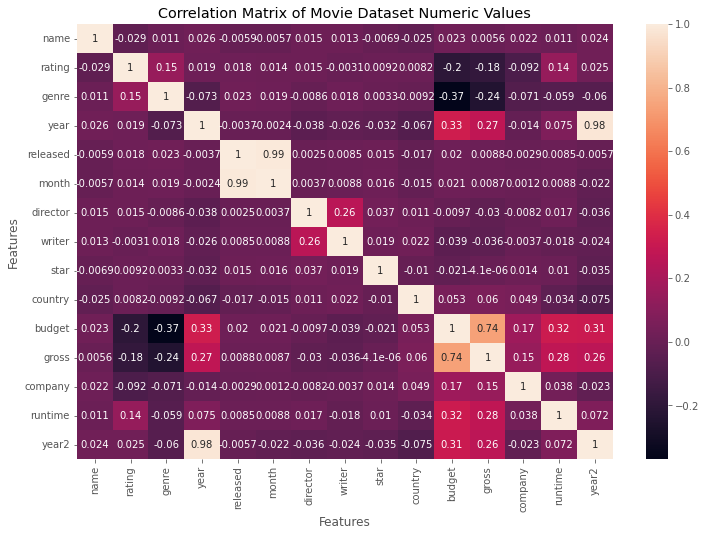

In [42]:
#Create a maxtrix for all the columns
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix of Movie Dataset Numeric Values') #Graph Title Name
plt.xlabel('Features') #x-axis label
plt.ylabel('Features') #y-axis label

plt.show()

In [43]:
df_numerized.corr()

,name,rating,genre,year,released,month,director,writer,star,country,budget,gross,company,runtime,year2
name,1.000000,-0.029234,0.010996,0.025542,-0.005874,-0.005709,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.023937
rating,-0.029234,1.000000,0.147796,0.019499,0.017910,0.013628,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.024500
genre,0.010996,0.147796,1.000000,-0.073167,0.023259,0.018725,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.059709
year,0.025542,0.019499,-0.073167,1.000000,-0.003667,-0.002365,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.983714
released,-0.005874,0.017910,0.023259,-0.003667,1.000000,0.990055,0.002473,0.008479,0.015121,-0.017326,0.020125,0.008807,-0.002910,0.008514,-0.005742
month,-0.005709,0.013628,0.018725,-0.002365,0.990055,1.000000,0.003708,0.008770,0.016492,-0.015340,0.021008,0.008715,0.001207,0.008763,-0.022118
director,0.015246,0.014656,-0.008553,-0.038354,0.002473,0.003708,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.036105
writer,0.012880,-0.003149,0.017578,-0.025908,0.008479,0.008770,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.023825
star,-0.006882,0.009196,0.003341,-0.032157,0.015121,0.016492,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.034613
country,-0.025490,0.008230,-0.009164,-0.066748,-0.017326,-0.015340,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.074608


In [44]:
#Unstack the correlations
correlation_movie = df_numerized.corr()
cor_pair = correlation_movie.unstack()
cor_pair

name   name        1.000000
       rating     -0.029234
       genre       0.010996
       year        0.025542
       released   -0.005874
                     ...   
year2  budget      0.312813
       gross       0.262897
       company    -0.023213
       runtime     0.072287
       year2       1.000000
Length: 225, dtype: float64

In [45]:
sort_pair = cor_pair.sort_values()
sort_pair

budget   genre     -0.368523
genre    budget    -0.368523
gross    genre     -0.244101
genre    gross     -0.244101
budget   rating    -0.203946
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
year2    year2      1.000000
Length: 225, dtype: float64

In [46]:
#Find the strong correlations that are higher than 0.5
strong_correlations = sort_pair[(sort_pair) > 0.5]

strong_correlations

gross     budget      0.740247
budget    gross       0.740247
year      year2       0.983714
year2     year        0.983714
month     released    0.990055
released  month       0.990055
name      name        1.000000
writer    writer      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
month     month       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
year2     year2       1.000000
dtype: float64

## Final Conclusion:
*There was a strong/positive correlation between the film budget and the gross revenue, which supports hypothesis.  
*There was a weak/positive correlation between the film budget and the company, which did not support hypothesis.  
*There were no other strong correlations in this dataset.